1) la diferencia entre la prediccion media e individual es que: mientras la prediccion media se haya utilizando la recta de regresion, la individual se haya mediante residuos, ambas predicciones deben dar el mismo resultado pero la diferencia esta en las varianzas que son distintas.
$\text{Varianza prediccion Media}\\
var(\hat Y_0)=\sigma^2[\frac{1}{n}+\frac{(X_0-\bar X)^2}{\sum x_i^2}]\\
\text{Varianza prediccion individual}\\
var(\hat Y_0)=\sigma^2[1+\frac{1}{n}+\frac{(X_0-\bar X)^2}{\sum x_i^2}]$


2)\
$y_0=\beta_1+\beta_2x_0\\
E(\hat y_0)=E(\beta_1)+E(\beta_2)x_0\\
var(\hat y_0)=var(\beta_1)+var(\beta_2)x_0^2+2cov(\beta_1\beta_2)x_0\\
var(y_0)=\frac{\sum X_i^2}{n\sum x^2_i}\sigma^2+\frac{\sigma^2}{\sum x^2_i}x_0^2+2(-\bar X(\frac{\sigma^2}{\sum x_i^2})x_0)\\
var(y_0)=\sigma^2(\frac{\sum X_i^2}{n\sum x^2_i}+\frac{x_0^2}{\sum x^2_i}+\frac{2(x_0-\bar X)}{\sum x_i^2})\\
var(y_0)=\sigma^2(\frac{1}{n}+\frac{(x_0-\bar X)^2}{\sum x_i^2})$

3) \
$var(y_0)=E(Y_0-E(y_0))^2\\
var(y_0)=E(x_0^T(b-\beta)(b-\beta)^Tx_0)\\
var(y_0)=x_0^TE((b-\beta)(b-\beta)^T)x_0\\
var(y_0)=\sigma^2x_0^T(X^TX)^{-1}x_0$

$var(\hat y_0-y_0)=E((\hat y_0-y_0)^2)\\
var(\hat y_0-y_0)=x_0^TE((b-\beta)(b-\beta)^T)x_0+E(e_0^2)-2E(e_0(b-\beta)^Tx_0)\\
var(\hat y_0-y_0)=\sigma^2x_0^T(X^TX)^{-1}x_0+\sigma^2+0\\
var(\hat y_0-y_0)=\sigma^2(x_0^T(X^TX)^{-1}x_0+1)$


In [ ]:
install.packages("wooldridge")
install.packages("stargazer")
install.packages("car")

In [ ]:
library(wooldridge)
library(stargazer)
library(car)
data("wage1",package = "wooldridge")
str(wage1)

 a) Muestre la tabla de salida de la regresión por medio del comando ‘Stargazer’ Nómbrela con un tı́tulo. En lugar de mostrar el error estándar de cada coeficiente, mostrar el intervalo de confianza al 95% y por comodidad el intercepto debe quedar arriba de la tabla y no abajo.

In [ ]:
modelo<-lm(log(wage)~female+nonwhite+married+educ+exper+tenure,data=wage1)


In [ ]:
stargazer(modelo,type="text", title="diferencia salarial",intercept.bottom=FALSE,intercept.top = TRUE,ci=TRUE)


diferencia salarial
                        Dependent variable:    
                    ---------------------------
                             log(wage)         
-----------------------------------------------
Constant                     0.491***          
                          (0.290, 0.691)       
                                               
female                       -0.286***         
                         (-0.359, -0.212)      
                                               
nonwhite                      -0.003           
                          (-0.119, 0.114)      
                                               
married                      0.126***          
                          (0.047, 0.204)       
                                               
educ                         0.084***          
                          (0.070, 0.098)       
                                               
exper                         0.003*           
                   

$\hat{ln(wage_i)}=0.491-0.286female_i-0.003nonwhite_i+0.126married_i+0.084educ_i+0.03exper_i+0.017tenure_i$

b) ¿Qué tan grande es el salario de un hombre a comparación de una mujer? ¿Es esta diferencia estadı́sticamente significativa? Muestre una gráfica que le permita validar esta información

Una  mujer gana en comparación con un hombre un $28.6\%$ menos. 

La diferencia es estadísticamente significativa con un nivel de significancia del $5\%$

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,520,98.44646,NA,NA,NA,NA
2,519,88.46190,1,9.984561,58.57875,9.589777e-14


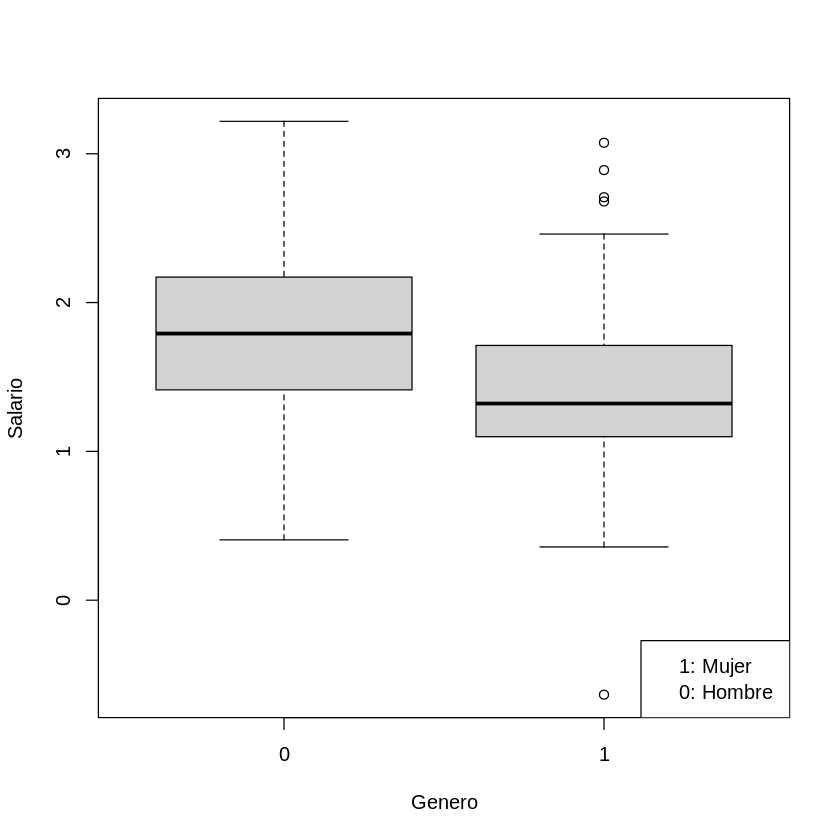

In [ ]:
boxplot(log(wage)~female,data = wage1,xlab='Genero',ylab='Salario')
legend('bottomright',legend=c('1: Mujer','0: Hombre'))

hip1<-matrix(c(0,1,0,0,0,0,0),ncol=7,nrow = 1,byrow = TRUE)
linearHypothesis(modelo,hypothesis.matrix = hip1,rhs = 0)


c) ¿Qué tan grande es el salario de alguien caucásico a comparación de alguien no caucásico? ¿Es esta diferencia estadı́sticamente significativa? Muestre una gráfica que le permita validar esta información.

Una persona no caucásica gana $0.3\%$ menos que alguien caucásico.

La diferencia no es estadísticamente significativa a un nivel de significancia del $5\%$

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,520,88.46221,NA,NA,NA,NA
2,519,88.46190,1,0.0003060024,0.001795296,0.9662193


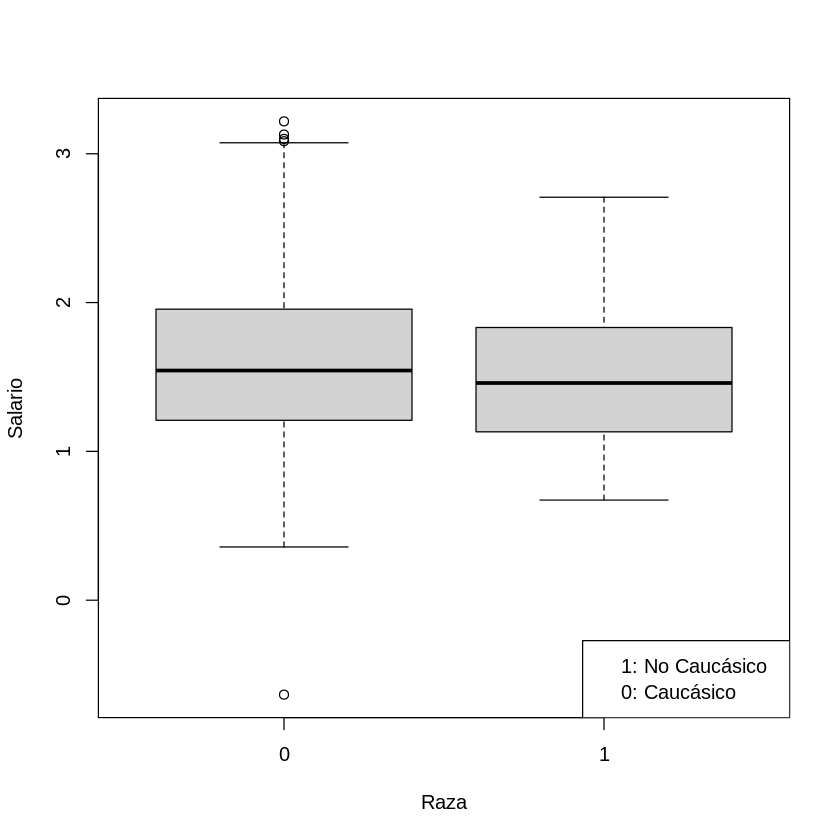

In [ ]:
boxplot(log(wage)~nonwhite,data = wage1,xlab='Raza',ylab='Salario')
legend('bottomright',legend=c('1: No Caucásico','0: Caucásico'))

hip2<-matrix(c(0,0,1,0,0,0,0),ncol=7,nrow = 1,byrow = TRUE)
linearHypothesis(modelo,hypothesis.matrix = hip2,rhs = 0)


d) ¿Qué tan grande es el salario de un individuo casado a comparación de alguien que no está casado? ¿Es esta diferencia estadı́sticamente significativa?Muestre una gráfica que le permita validar esta información.

Una persona casada gana $12.6\%$ más que alguien soltero.

La diferencia  es estadísticamente significativa a un nivel de significancia del $5\%$

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,520,90.13525,NA,NA,NA,NA
2,519,88.46190,1,1.673352,9.817445,0.001826314


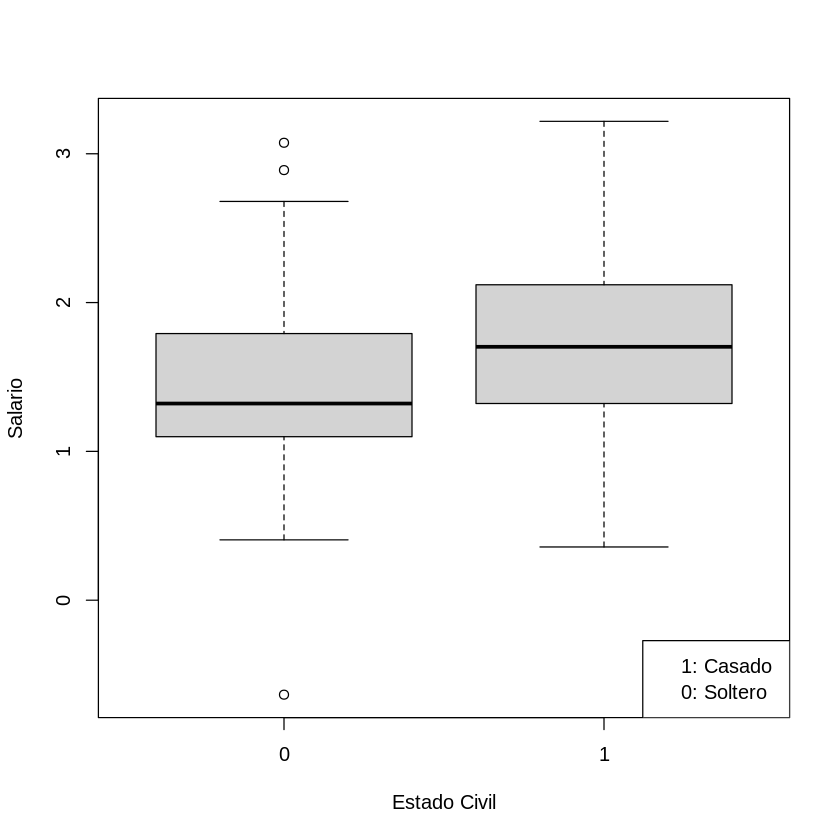

In [ ]:
boxplot(log(wage)~married,data=wage1,xlab='Estado Civil',ylab='Salario')
legend('bottomright',legend=c('1: Casado','0: Soltero'))

hip3<-matrix(c(0,0,0,1,0,0,0),ncol=7,nrow = 1,byrow = TRUE)
linearHypothesis(modelo,hypothesis.matrix = hip3,rhs = 0)


e) ¿Qué tan grande es el salario de un hombre casado a comparación de una mujer no casada? ¿Es esta diferencia estadı́sticamente significativa?

$E(wage|female=0,married=1)-E(wage|female=1,married=0)=(0.491+0.126)-(0.491-0.286)=0.412$.

Es decir, un hombre casado gana $41.2\%$ más que una mujer soltera

f ) ¿Qué tan grande es el salario de una mujer caucásica y casada a comparación con un hombre no caucásico ni casado? ¿Es esta diferencia estadı́sticamente significativa?

$E(wage|nonwhite=0,female=1,married=1)-E(wage|female=0,nonwhite=1,married=1)=(0.491-0.286+0.126)-(0.491-0.003+0.126)=-0.283$.

Es decir, una mujer caucásica y casada gana $28.3\%$ menos que un hombre no caucásico y soltero.

g) Calcule:\
*i*)Suma de Residuos al Cuadrado,\
ii) varianza y desviación estándar de los residuos,\
iii) Matriz X ′ X y su inversa (incluya el intercepto),\
iv)‘t’ tabulado/crı́tico a dos colas con α = 5%.

In [ ]:
SSE<-sum((modelo$residuals)^2)
SSE

[1] 88.4619

In [ ]:
var_res<-SSE/(526-6-1)
var_res

[1] 0.1704468

In [ ]:
sd_res<-sqrt(var_res)
sd_res

[1] 0.4128521

In [ ]:
x<-model.matrix(modelo)

In [ ]:
xtx<-t(x)%*%x
xtx

,(Intercept),female,nonwhite,married,educ,exper,tenure
(Intercept),526,252,54,320,6608,8951,2685
female,252,252,25,132,3104,4140,911
nonwhite,54,25,54,28,641,950,289
married,320,132,28,320,4069,6549,2078
educ,6608,3104,641,4069,87040,106539,33141
exper,8951,4140,950,6549,106539,249027,71393
tenure,2685,911,289,2078,33141,71393,41107


In [ ]:
xtx_inv<-solve(xtx)
xtx_inv

In [ ]:
Cov_betas<-var_res*xtx_inv
Cov_betas

,(Intercept),female,nonwhite,married,educ,exper,tenure
(Intercept),1.045117e-02,-1.015753e-03,-8.617481e-04,-1.788599e-04,-6.581368e-04,-7.250958e-05,1.149861e-05
female,-1.015753e-03,1.392131e-03,5.452671e-05,2.011686e-04,1.557930e-05,-4.674110e-06,2.049927e-05
nonwhite,-8.617481e-04,5.452671e-05,3.558156e-03,1.446257e-04,3.160857e-05,-9.768116e-08,-2.561250e-06
married,-1.788599e-04,2.011686e-04,1.446257e-04,1.607802e-03,-4.403393e-05,-1.905530e-05,-6.473142e-06
educ,-6.581368e-04,1.557930e-05,3.160857e-05,-4.403393e-05,4.899463e-05,3.979693e-06,-1.765666e-06
exper,-7.250958e-05,-4.674110e-06,-9.768116e-08,-1.905530e-05,3.979693e-06,2.834786e-06,-2.328152e-06
tenure,1.149861e-05,2.049927e-05,-2.561250e-06,-6.473142e-06,-1.765666e-06,-2.328152e-06,8.753238e-06


In [ ]:
t_tab<-qt(0.975,df = 526-6-1,lower.tail = TRUE)
t_tab


[1] 1.964545

In [ ]:
t_critico<-modelo$coefficients/sqrt(diag(Cov_betas))
as.data.frame(t_critico)

,t_critico
,<dbl>
(Intercept),4.79962562
female,-7.65367537
nonwhite,-0.04237093
married,3.13328021
educ,11.98389728
exper,1.86143328
tenure,5.70166137


$H_o: \beta_j=0$   vs   $H_a: \beta_j\neq0\quad$ Nivel de significancia $\alpha=5\%$

In [ ]:
as.data.frame(ifelse(abs(t_critico)>t_tab,"Se rechaza Ho","No se rechaza Ho"))

,"ifelse(abs(t_critico) > t_tab, ""Se rechaza Ho"", ""No se rechaza Ho"")"
,<chr>
(Intercept),Se rechaza Ho
female,Se rechaza Ho
nonwhite,No se rechaza Ho
married,Se rechaza Ho
educ,Se rechaza Ho
exper,No se rechaza Ho
tenure,Se rechaza Ho


h) Cree un intervalo de confianza para el salario mensual medio de una mujer caucásica y casada con 16 años de educación, 4 años y medio de experiencia laboral y que hace 6 meses empezó a trabajar en una nueva empresa.

*Predicción media

In [ ]:
predict(object=modelo, newdata = data.frame(female=1,nonwhite=0,married=1,educ=16,exper=4.5,tenure=0.5),interval = 'confidence')

,fit,lwr,upr
1,1.695399,1.6123,1.778498


*Predicción individual

In [ ]:
predict(object=modelo, newdata = data.frame(female=1,nonwhite=0,married=1,educ=16,exper=4.5,tenure=0.5),interval = 'prediction')

,fit,lwr,upr
1,1.695399,0.8800866,2.510712


i) Cree un intervalo de confianza para el salario mensual medio de un hombre no caucásico y casado con 5 años de educación, 15 años de experiencia laboral y que siempre ha trabajado en la misma empresa.

*Predicción media

In [ ]:
predict(object=modelo, newdata = data.frame(female=0,nonwhite=1,married=1,educ=5,exper=15,tenure=15),interval = 'confidence')


,fit,lwr,upr
1,1.333237,1.162421,1.504053


*Predicción individual

In [ ]:
predict(object=modelo, newdata = data.frame(female=0,nonwhite=1,married=1,educ=5,exper=15,tenure=15),interval = 'prediction')


,fit,lwr,upr
1,1.333237,0.5043776,2.162095


j) ¿Por qué puede darse esta diferencia entre ambos individuos?

Se diferencia porque estadisticamente se encontro una diferencia significativa entre las variables de Genero, Estado Civil, Años de Educacion y el Tiempo de trabajo en la empresa.